# HPO 

for SINC sdf (series dataframe) and HOUSING db (database) 

from 29 09 Lecture 


## Theoretical Background



### Linear Regression (Analytical)


Minimizes the squared error:

$$
\min_{w} \|y - Xw\|_2^2
$$

with the closed-form solution:

$$
\hat{w} = (X^T X)^{-1} X^T y
$$

This method provides an exact solution but becomes computationally expensive for large or high-dimensional datasets.




Introduces a nonlinear mapping through kernel functions:

$$
\min_{\alpha} \|y - K\alpha\|_2^2 + \lambda\,\alpha^T K \alpha
$$

where the kernel matrix is defined as:

$$
K_{ij} = \exp(-\gamma \|x_i - x_j\|^2)
$$

and the prediction for a new sample \( x_* \) is:

$$
\hat{y}(x_*) = K(x_*, X)\,\alpha
$$



### Hyperparameter Optimization (HPO)



Optimizes α and γ through **Bayesian Optimization**, building a probabilistic surrogate of the objective (MSE) and iteratively refining the search space for best generalization.




### code implementation 

In [ ]:
!pip install scikit-optimize

  Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl (107 kB)
  Using cached pyaml-25.7.0-py3-none-any.whl (26 kB)
  Using cached pyyaml-6.0.3-cp39-cp39-win_amd64.whl (158 kB)


You should consider upgrading via the 'A:\wnOs\LR\machineLearningTheoryEnv\TAM\devEnv\MLT_LR\PYDevEnv\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd

######
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### sinc db

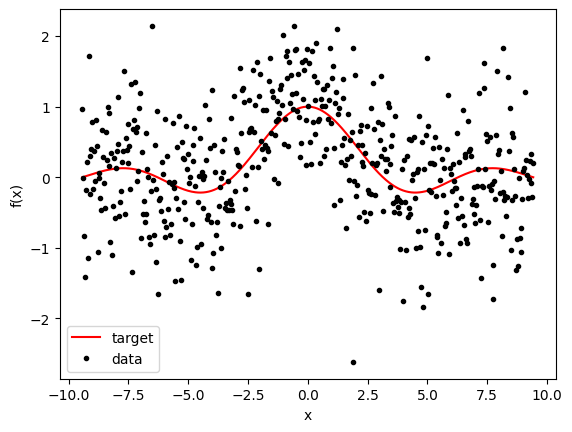

In [2]:
#Ayuda de código:
N = 500 #número de muestras
X = np.linspace(-3*np.pi,3*np.pi,N) #vector de entrada
y = np.sinc(X/np.pi) #función sinc -> objetivo
var = 0.5 #varianza del ruido-> PROBAR DISTINTOS VALORES
mue = 0 #media del ruido
noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])#ruido blanco
yn = y + noise #señal co ruido
plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [3]:
Xdata = X.reshape(-1,1) #N=500, P= 1
y = y.reshape(-1,1)
ydata = yn.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata,
                                                    test_size=0.3)#particionar train y test

proceed to find the PARAMETERS : 

     -------------------------------------- 107.8/107.8 KB 1.6 MB/s eta 0:00:00
     -------------------------------------- 158.8/158.8 KB 9.3 MB/s eta 0:00:00


You should consider upgrading via the 'A:\wnOs\LR\machineLearningTheoryEnv\TAM\localEnv\mlDevelopEnv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict


In [11]:
# --- Bayesian Optimization for KernelRidge Hyperparameters --
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline

# Define the pipeline
steps = [('reg', KernelRidge(kernel='rbf'))]
pipeline = Pipeline(steps=steps)

# Define the search space for BayesSearchCV
search_spaces = {
    'reg__alpha': Real(1e-6, 1e3, prior='log-uniform'),
    'reg__gamma': Real(1e-6, 1e3, prior='log-uniform')
}

# Bayesian optimization with cross-validation
opt = BayesSearchCV(
    pipeline,
    search_spaces,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=10,
    n_jobs=4,
    scoring='neg_mean_absolute_error',
    verbose=10,
    refit=True,
    random_state=0
)

opt.fit(X_train, y_train)
# Best model
best_model = opt.best_estimator_

print("\nMejores parámetros (Bayesian Optimization):\n")
print(opt.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

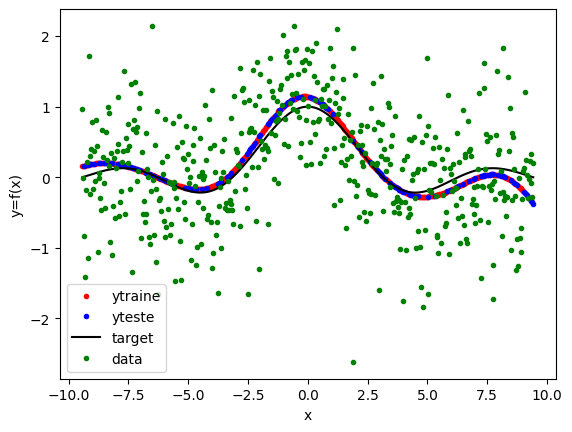

In [12]:
y_test_e = opt.best_estimator_.predict(X_test)
y_train_e = opt.best_estimator_.predict(X_train)
plt.plot(X_train,y_train_e,'r.',label='ytraine' )
plt.plot(X_test,y_test_e,'b.',label='yteste')
plt.plot(X,y,'k',label='target' )
plt.plot(Xdata,ydata,'g.',label='data' )
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on train and test sets
y_train_pred = opt.best_estimator_.predict(X_train)
y_test_pred = opt.best_estimator_.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE (train): {mse_train:.6f}")
print(f"MSE (test):  {mse_test:.6f}")
print(f"R^2 (train): {r2_train:.6f}")
print(f"R^2 (test):  {r2_test:.6f}")

MSE (train): 0.458963
MSE (test):  0.500111
R^2 (train): 0.282467
R^2 (test):  0.214867


####  california housing

In [ ]:
housing = fetch_california_housing(as_frame=True)  # as_frame=True te da DataFrame con nombres
X = housing.data.values           # (n, d)  d=8
y = housing.target.values         # (n,)

# Split the data 
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
                

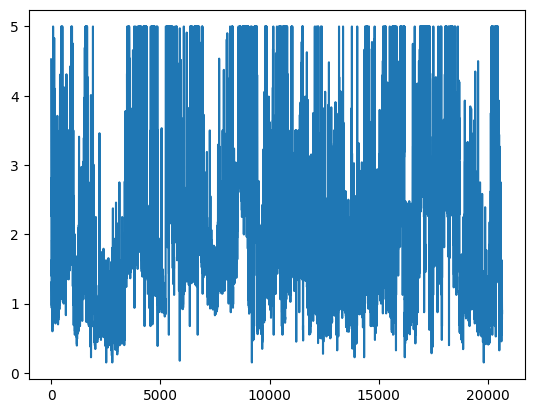

In [ ]:
plt.plot(y) # print the ouput wh/ ourder
plt.show() #


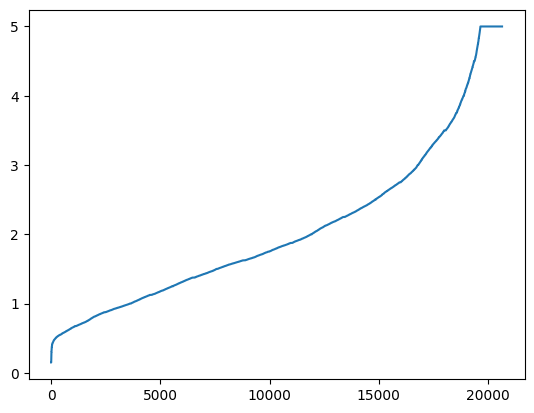

In [ ]:
plt.plot(np.sort(y)) # sorting the output cause if not ...
plt.show() # this isnt lineal #

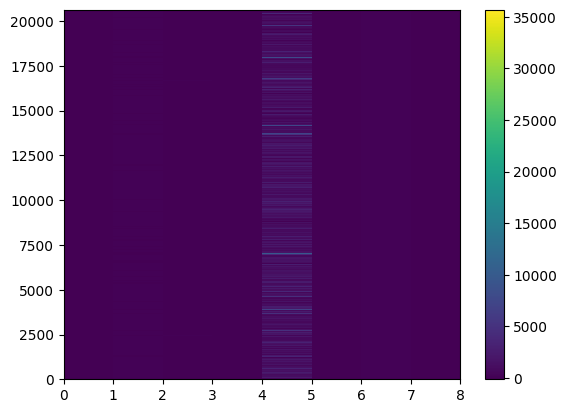

In [ ]:
ind= np.argsort(y) # return index
# here we index the vector
plt.pcolormesh(X[ind]) # sorting about the index of y
plt.colorbar()
plt.show()

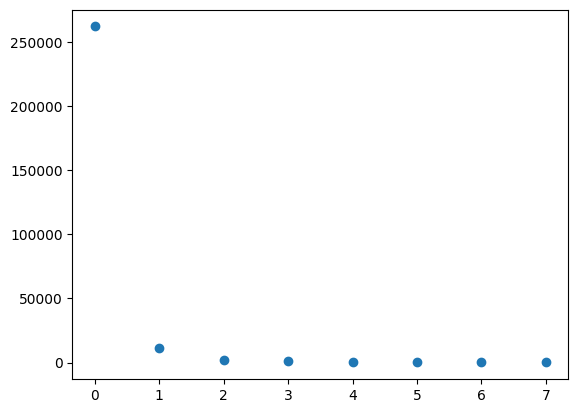

In [ ]:
U,S ,Vh = np.linalg.svd(X) # S, es la descomposicion lineal en bases ortogonales (espectro de la DB)
plt.scatter(np.arange(len(S)),S)
plt.show()

# from here: 

create pipeline to polinomial model and RADIO BASIS FUNCTION (RBF) , this last one just to proof, in order to see compute process utility  

now proceed creating a class to manage the SGD process 

In [ ]:
class LinearRegressionGD:
    """
    Regresión lineal entrenada con Gradiente Descendiente (full o mini-batch).
    - Estandariza X internamente (almacena scaler).
    - fit_intercept=True -> maneja 'b' añadiendo columna de 1s.
    - l2 >= 0 para regularización (ridge-like).
    - history_: {'loss': [...], 'val_loss': [...]}
    """
    def __init__(self, lr=0.1, n_iters=1000, batch_size=None,
                 fit_intercept=True, tol=1e-6, l2=0.0, random_state=None):
        self.lr = lr
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.fit_intercept = fit_intercept
        self.tol = tol
        self.l2 = l2
        self.random_state = np.random.RandomState(random_state) if random_state is not None else np.random

    def _add_intercept(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X]) if self.fit_intercept else X

    def _loss(self, Xb, y, w):
        n = Xb.shape[0]
        resid = Xb @ w - y
        data = 0.5 / n * (resid @ resid)
        reg  = 0.5 * self.l2 * (w[1:] @ w[1:]) if self.fit_intercept else 0.5 * self.l2 * (w @ w)
        return data + reg

    def fit(self, X, y, X_val=None, y_val=None, verbose=False):
        self.scaler_ = StandardScaler()
        Xs = self.scaler_.fit_transform(X)
        Xb = self._add_intercept(Xs)
        n, d = Xb.shape

        self.w_ = self.random_state.normal(scale=0.01, size=d)
        self.history_ = {"loss": [], "val_loss": []}
        prev = np.inf

        for it in range(self.n_iters):
            # Muestreo mini-batch
            idx = np.arange(n) if (self.batch_size is None or self.batch_size >= n) \
                  else self.random_state.choice(n, size=self.batch_size, replace=False)
            Xb_i, y_i = Xb[idx], y[idx]

            # Gradiente
            err  = Xb_i @ self.w_ - y_i
            grad = (Xb_i.T @ err) / Xb_i.shape[0]
            if self.l2 > 0:
                if self.fit_intercept: grad[1:] += self.l2 * self.w_[1:]
                else:                   grad     += self.l2 * self.w_
            # Paso
            self.w_ -= self.lr * grad

            # Tracking
            tr = self._loss(Xb, y, self.w_)
            self.history_["loss"].append(tr)

            if X_val is not None and y_val is not None:
                Xvb = self._add_intercept(self.scaler_.transform(X_val))
                vl  = self._loss(Xvb, y_val, self.w_)
                self.history_["val_loss"].append(vl)

            if abs(prev - tr) < self.tol:
                if verbose: print(f"Converged @ iter {it}")
                break
            prev = tr
        return self

    def predict(self, X):
        Xb = self._add_intercept(self.scaler_.transform(X))
        return Xb @ self.w_


once we load our dataset and split it : 

proceed with the train 

In [ ]:
gd_h = LinearRegressionGD(lr=0.1, n_iters=200, batch_size=256,
                          fit_intercept=True, tol=1e-8, l2=1e-3, random_state=0)

also adjust or fit the model: 

In [ ]:
gd_h.fit(Xtr, ytr, X_val=Xte, y_val=yte)


then we can predict about the data test: 

In [ ]:
yp = gd_h.predict(Xte)

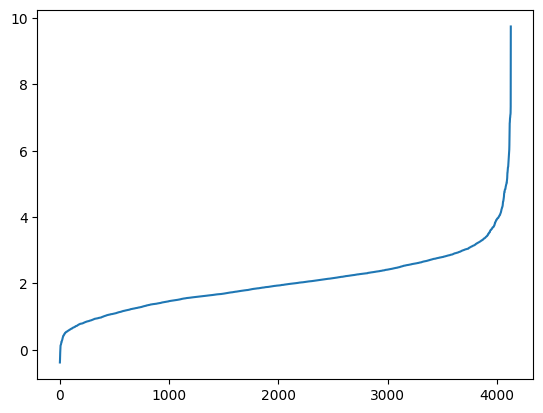

In [ ]:
plt.plot(np.sort(yp)) # sorting the output
plt.show() 

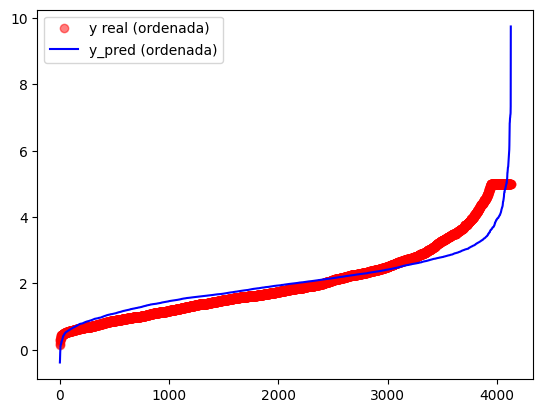

In [ ]:
plt.plot(np.sort(yte), 'o', c='r', label='y real (ordenada)', alpha=0.5)
plt.plot(np.sort(yp), '-', c='b', label='y_pred (ordenada)')
plt.legend()
plt.show()


also, see the performance: 

In [ ]:
print("MSE:", mean_squared_error(yte, yp))
print("R^2:", r2_score(yte, yp))

MSE: 0.5593814201140437
R^2: 0.5731245516457308


now proceed with the loss per epoch :

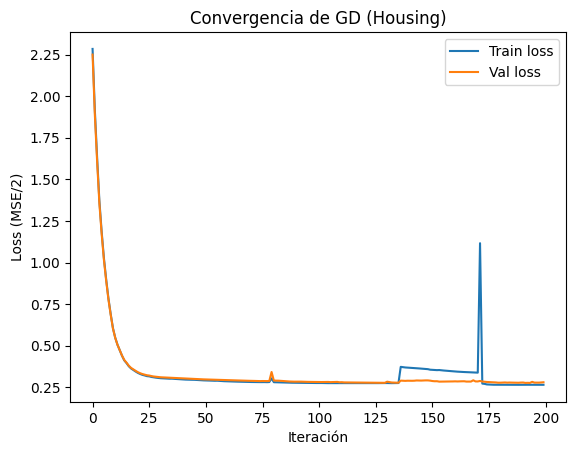

In [ ]:
# Curva de pérdida
plt.figure()
plt.plot(gd_h.history_["loss"], label="Train loss")
if gd_h.history_.get("val_loss") and len(gd_h.history_["val_loss"])>0:
    plt.plot(gd_h.history_["val_loss"], label="Val loss")
plt.xlabel("Iteración")
plt.ylabel("Loss (MSE/2)")
plt.title("Convergencia de GD (Housing)")
plt.legend()
plt.show()

finally, wanna see the features correlation :

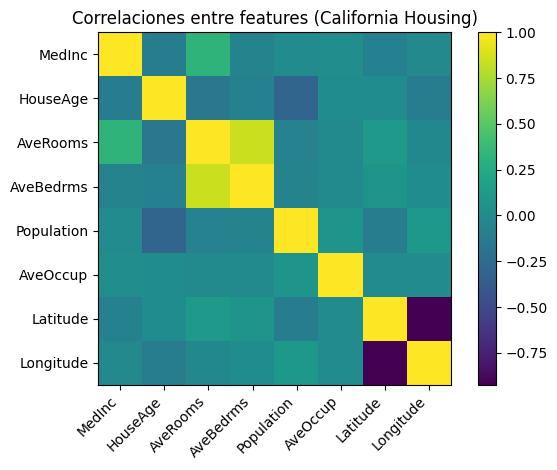

In [ ]:
# Matriz de correlación sobre X original (sin estandarizar)
C = np.corrcoef(X, rowvar=False)

plt.figure()
plt.imshow(C, interpolation="nearest")
plt.colorbar()
plt.xticks(range(C.shape[1]), getattr(housing, "feature_names", [f"x{i}" for i in range(C.shape[1])]), rotation=45, ha="right")
plt.yticks(range(C.shape[1]), getattr(housing, "feature_names", [f"x{i}" for i in range(C.shape[1])]))
plt.title("Correlaciones entre features (California Housing)")
plt.tight_layout()
plt.show()


l2	MSE		R2
0e+00	0.556782	0.575108
1e-05	0.556775	0.575114
1e-04	0.556707	0.575165
1e-03	0.556066	0.575655
1e-02	0.552253	0.578565
1e-01	0.582692	0.555336


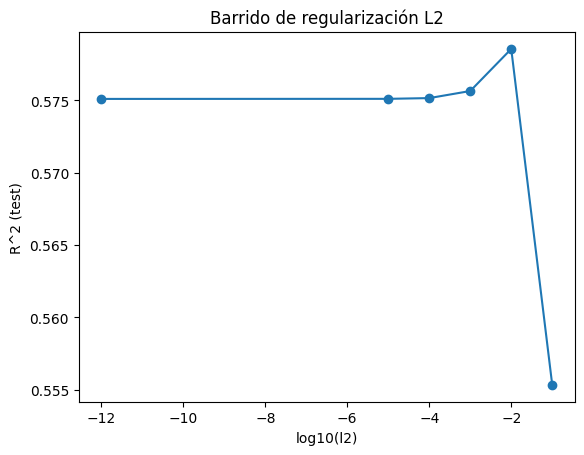

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

l2_grid = [0.0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
results = []

for l2 in l2_grid:
    model = LinearRegressionGD(
        lr=0.05, n_iters=5000, batch_size=256,
        fit_intercept=True, tol=1e-8, l2=l2, random_state=0
    )
    model.fit(Xtr, ytr, X_val=Xte, y_val=yte)
    ypred = model.predict(Xte)
    mse = mean_squared_error(yte, ypred)
    r2  = r2_score(yte, ypred)
    results.append((l2, mse, r2, model.w_.copy()))

# Mostrar tabla simple
print("l2\tMSE\t\tR2")
for l2, mse, r2, _ in results:
    print(f"{l2:.0e}\t{mse:.6f}\t{r2:.6f}")

# Gráfica R2 vs log10(l2)
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
x = [np.log10(max(1e-12, l2)) for l2,_,_,_ in results]  # evitar log10(0)
y = [r2 for _,_,r2,_ in results]
plt.plot(x, y, marker="o")
plt.xlabel("log10(l2)")
plt.ylabel("R^2 (test)")
plt.title("Barrido de regularización L2")
plt.show()


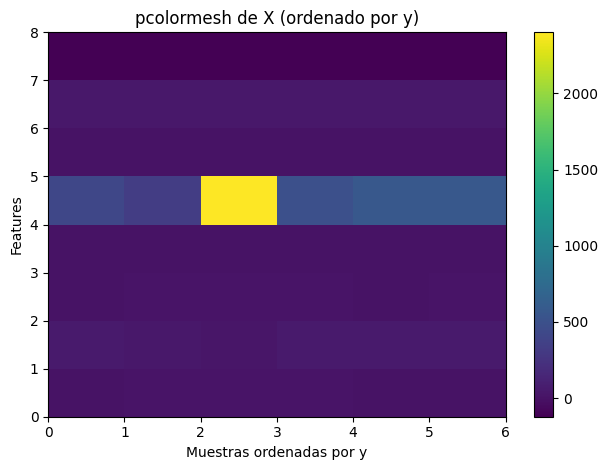

In [ ]:

# Ordenar por y para visualizar patrones (como en tu cuaderno)
ind = np.argsort(y)
plt.figure()
plt.pcolormesh(X[ind, :].T)
plt.xlabel("Muestras ordenadas por y")
plt.ylabel("Features")
plt.title("pcolormesh de X (ordenado por y)")
plt.colorbar()
plt.tight_layout()
plt.show()